In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [12]:
data =pd.read_excel("flixpatroll.xlsx")
data.head()

,Rank,Title,Type,Premiere,Genre,Watchtime,Watchtime in Million
0,1.0,The Night Agent,TV Show,2023.0,Action,"812,100,000",812.1M
1,2.0,Ginny & Georgia,TV Show,2021.0,Drama,"665,100,000",665.1M
2,3.0,The Glory,TV Show,2022.0,Thriller,"622,800,000",622.8M
3,4.0,Wednesday,TV Show,2022.0,Fantasy,"507,700,000",507.7M
4,5.0,Queen Charlotte: A Bridgerton Story,TV Show,2023.0,Drama,"503,000,000",503.0M


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18164 entries, 0 to 18163
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Rank                  18164 non-null  float64
 1   Title                 18164 non-null  object 
 2   Type                  18164 non-null  object 
 3   Premiere              18030 non-null  float64
 4   Genre                 17984 non-null  object 
 5   Watchtime             18164 non-null  object 
 6   Watchtime in Million  18164 non-null  object 
dtypes: float64(2), object(5)
memory usage: 993.5+ KB


In [15]:
data["Premiere"] = data["Premiere"].astype("Int64")
data["Rank"] = data ["Rank"].astype("Int64")
data.head()


,Rank,Title,Type,Premiere,Genre,Watchtime,Watchtime in Million
0,1,The Night Agent,TV Show,2023,Action,"812,100,000",812.1M
1,2,Ginny & Georgia,TV Show,2021,Drama,"665,100,000",665.1M
2,3,The Glory,TV Show,2022,Thriller,"622,800,000",622.8M
3,4,Wednesday,TV Show,2022,Fantasy,"507,700,000",507.7M
4,5,Queen Charlotte: A Bridgerton Story,TV Show,2023,Drama,"503,000,000",503.0M


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18164 entries, 0 to 18163
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Rank                  18164 non-null  Int64 
 1   Title                 18164 non-null  object
 2   Type                  18164 non-null  object
 3   Premiere              18030 non-null  Int64 
 4   Genre                 17984 non-null  object
 5   Watchtime             18164 non-null  object
 6   Watchtime in Million  18164 non-null  object
dtypes: Int64(2), object(5)
memory usage: 1.0+ MB


In [17]:
data.columns

Index(['Rank', 'Title', 'Type', 'Premiere', 'Genre', 'Watchtime',
       'Watchtime in Million'],
      dtype='object')

In [18]:
data.isnull().sum()

Rank                      0
Title                     0
Type                      0
Premiere                134
Genre                   180
Watchtime                 0
Watchtime in Million      0
dtype: int64

In [19]:
df= data.dropna()
df.head()

,Rank,Title,Type,Premiere,Genre,Watchtime,Watchtime in Million
0,1,The Night Agent,TV Show,2023,Action,"812,100,000",812.1M
1,2,Ginny & Georgia,TV Show,2021,Drama,"665,100,000",665.1M
2,3,The Glory,TV Show,2022,Thriller,"622,800,000",622.8M
3,4,Wednesday,TV Show,2022,Fantasy,"507,700,000",507.7M
4,5,Queen Charlotte: A Bridgerton Story,TV Show,2023,Drama,"503,000,000",503.0M


In [20]:
df.isnull().sum()

Rank                    0
Title                   0
Type                    0
Premiere                0
Genre                   0
Watchtime               0
Watchtime in Million    0
dtype: int64

In [21]:
df["Type"].unique()

array(['TV Show', 'Movie'], dtype=object)

In [22]:
df["Genre"].unique()

array(['Action', 'Drama', 'Thriller', 'Fantasy', 'Crime', 'Reality-Show',
       'Comedy', 'History', 'Superhero', 'Animation', 'Science Fiction',
       'Horror', 'Adventure', 'Documentary', 'War', 'Musical', 'Romance',
       'Family', 'Stand-Up', 'Western', 'Sports', 'Biography',
       'Talk Show', 'Game-Show', 'Broadcast', 'Concerts', 'News',
       'Fairy Tale'], dtype=object)

In [23]:
df["Premiere"].unique()

<IntegerArray>
[2023, 2021, 2022, 2018, 2011, 2020, 2012, 2013, 2010, 2016, 2003, 2019, 2008,
 2017, 2000, 2004, 2015, 2014, 2009, 1996, 2005, 1994, 2007, 2001, 1989, 1997,
 2006, 2002, 1993, 1999, 1995, 1972, 1983, 1978, 1998, 1974, 1986, 1988, 1991,
 1976, 1985, 1987, 1992, 1977, 1990, 1979, 1973, 1982, 1966, 1984, 1980, 1975,
 1940, 1963, 1970, 1981, 1964, 1960, 1971, 1968, 1969, 1962, 1954, 1961, 1953,
 1957, 1956, 1958, 1965, 1951, 1955, 1967, 1952]
Length: 73, dtype: Int64

In [24]:
df.head()

,Rank,Title,Type,Premiere,Genre,Watchtime,Watchtime in Million
0,1,The Night Agent,TV Show,2023,Action,"812,100,000",812.1M
1,2,Ginny & Georgia,TV Show,2021,Drama,"665,100,000",665.1M
2,3,The Glory,TV Show,2022,Thriller,"622,800,000",622.8M
3,4,Wednesday,TV Show,2022,Fantasy,"507,700,000",507.7M
4,5,Queen Charlotte: A Bridgerton Story,TV Show,2023,Drama,"503,000,000",503.0M


In [25]:
type_average=df.groupby("Type")[["Watchtime"]].sum().round().reset_index()
type_average

,Type,Watchtime
0,Movie,"249,900,000209,700,000201,800,000181,800,00017..."
1,TV Show,"812,100,000665,100,000622,800,000507,700,00050..."


In [26]:
rank_average=df.groupby("Type")[["Rank"]].mean().reset_index()
rank_average

,Type,Rank
0,Movie,10666.579036
1,TV Show,6649.615385


Text(0.5, 1.0, 'Rank Average of Types')

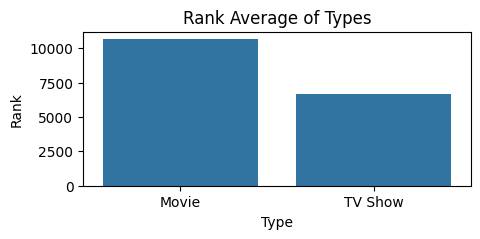

In [27]:
plt.figure(figsize=(5,2))
sns.barplot(x = "Type",y="Rank",data=rank_average)
plt.xlabel("Type")
plt.ylabel("Rank")
plt.title("Rank Average of Types")

(np.float64(-1.0999984074489912),
 np.float64(1.099999902328061),
 np.float64(-1.0999986785475624),
 np.float64(1.0999939468621598))

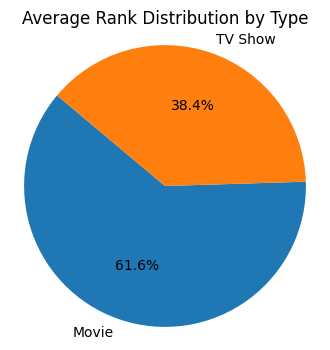

In [28]:
plt.figure(figsize=(4, 4))
plt.pie(rank_average["Rank"], labels=rank_average["Type"], autopct='%1.1f%%', startangle=140)
plt.title("Average Rank Distribution by Type")
plt.axis('equal')

In [29]:
df.head()

,Rank,Title,Type,Premiere,Genre,Watchtime,Watchtime in Million
0,1,The Night Agent,TV Show,2023,Action,"812,100,000",812.1M
1,2,Ginny & Georgia,TV Show,2021,Drama,"665,100,000",665.1M
2,3,The Glory,TV Show,2022,Thriller,"622,800,000",622.8M
3,4,Wednesday,TV Show,2022,Fantasy,"507,700,000",507.7M
4,5,Queen Charlotte: A Bridgerton Story,TV Show,2023,Drama,"503,000,000",503.0M


In [30]:
import plotly.express as px
df.head()

genre_counts = data['Genre'].value_counts().reset_index()
genre_counts.columns = ['Genre', 'Count'] 

fig = px.bar(genre_counts, 
             x='Genre', 
             y='Count', 
             title='Genre Distribution',
             color='Count',
             text='Count') 
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')  
fig.update_layout(xaxis_title='Genre', yaxis_title='Count', barmode='group')


ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'alignmentgroup': 'True',
              'hovertemplate': 'Genre=%{x}<br>Count=%{marker.color}<extra></extra>',
              'legendgroup': '',
              'marker': {'color': array([3946, 3349, 2670, 1294, 1100, 1081,  675,  654,  574,  519,  398,  303,
                                          281,  224,  199,  154,  143,   90,   82,   72,   55,   40,   22,   20,
                                           17,   12,    9,    1]),
                         'coloraxis': 'coloraxis',
                         'pattern': {'shape': ''}},
              'name': '',
              'offsetgroup': '',
              'orientation': 'v',
              'showlegend': False,
              'text': array([3.946e+03, 3.349e+03, 2.670e+03, 1.294e+03, 1.100e+03, 1.081e+03,
                             6.750e+02, 6.540e+02, 5.740e+02, 5.190e+02, 3.980e+02, 3.030e+02,
                             2.810e+02, 2.240e+02, 1.990e+02, 1.540e+02, 1.430e+02, 9.000e+01,
                             8.200e+01, 7.200e+01, 5.500e+01, 4.000e+01, 2.200e+01, 2.000e+01,
                             1.700e+01, 1.200e+01, 9.000e+00, 1.000e+00]),
              'textposition': 'outside',
              'texttemplate': '%{text:.2s}',
              'type': 'bar',
              'x': array(['Comedy', 'Drama', 'Animation', 'Documentary', 'Action', 'Crime',
                          'Thriller', 'Horror', 'Reality-Show', 'Romance', 'Science Fiction',
                          'Fantasy', 'Adventure', 'Stand-Up', 'Biography', 'History', 'Superhero',
                          'War', 'Talk Show', 'Family', 'Western', 'Musical', 'Broadcast',
                          'Concerts', 'Sports', 'Fairy Tale', 'Game-Show', 'News'], dtype=object),
              'xaxis': 'x',
              'y': array([3946, 3349, 2670, 1294, 1100, 1081,  675,  654,  574,  519,  398,  303,
                           281,  224,  199,  154,  143,   90,   82,   72,   55,   40,   22,   20,
                            17,   12,    9,    1]),
              'yaxis': 'y'}],
    'layout': {'barmode': 'group',
               'coloraxis': {'colorbar': {'title': {'text': 'Count'}},
                             'colorscale': [[0.0, '#0d0887'], [0.1111111111111111,
                                            '#46039f'], [0.2222222222222222,
                                            '#7201a8'], [0.3333333333333333,
                                            '#9c179e'], [0.4444444444444444,
                                            '#bd3786'], [0.5555555555555556,
                                            '#d8576b'], [0.6666666666666666,
                                            '#ed7953'], [0.7777777777777778,
                                            '#fb9f3a'], [0.8888888888888888,
                                            '#fdca26'], [1.0, '#f0f921']]},
               'legend': {'tracegroupgap': 0},
               'template': '...',
               'title': {'text': 'Genre Distribution'},
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0], 'title': {'text': 'Genre'}},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'Count'}}}
})

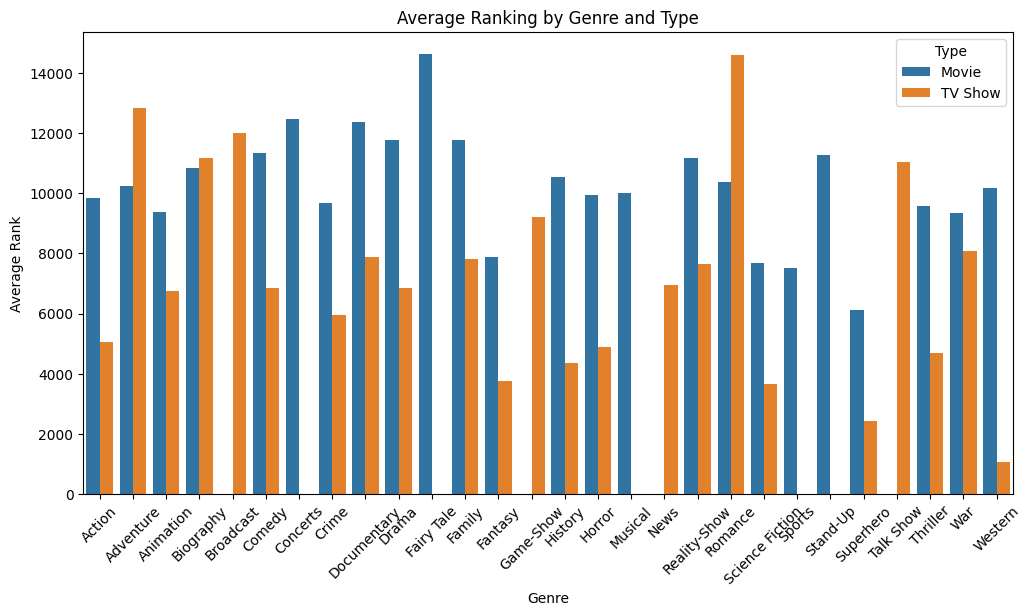

In [31]:

genre_type_rank = data.groupby(['Genre', 'Type'])[['Rank']].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x='Genre', y='Rank', hue='Type', data=genre_type_rank)
plt.title('Average Ranking by Genre and Type')
plt.ylabel('Average Rank')
plt.xlabel('Genre')
plt.xticks(rotation=45)
plt.legend(title='Type')
plt.show()


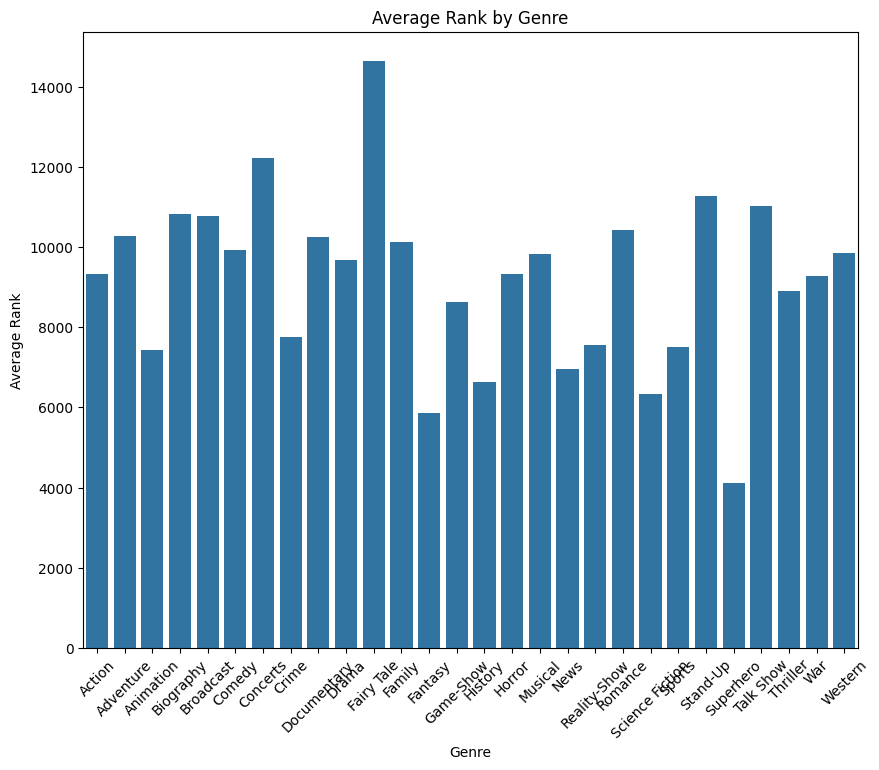

In [33]:

genre_rank_avg = df.groupby('Genre')[['Rank']].mean().reset_index()


plt.figure(figsize=(10, 8))
sns.barplot(x='Genre', y='Rank', data=genre_rank_avg)
plt.title('Average Rank by Genre')
plt.xlabel('Genre')
plt.ylabel('Average Rank')
plt.xticks(rotation=45)
plt.show()


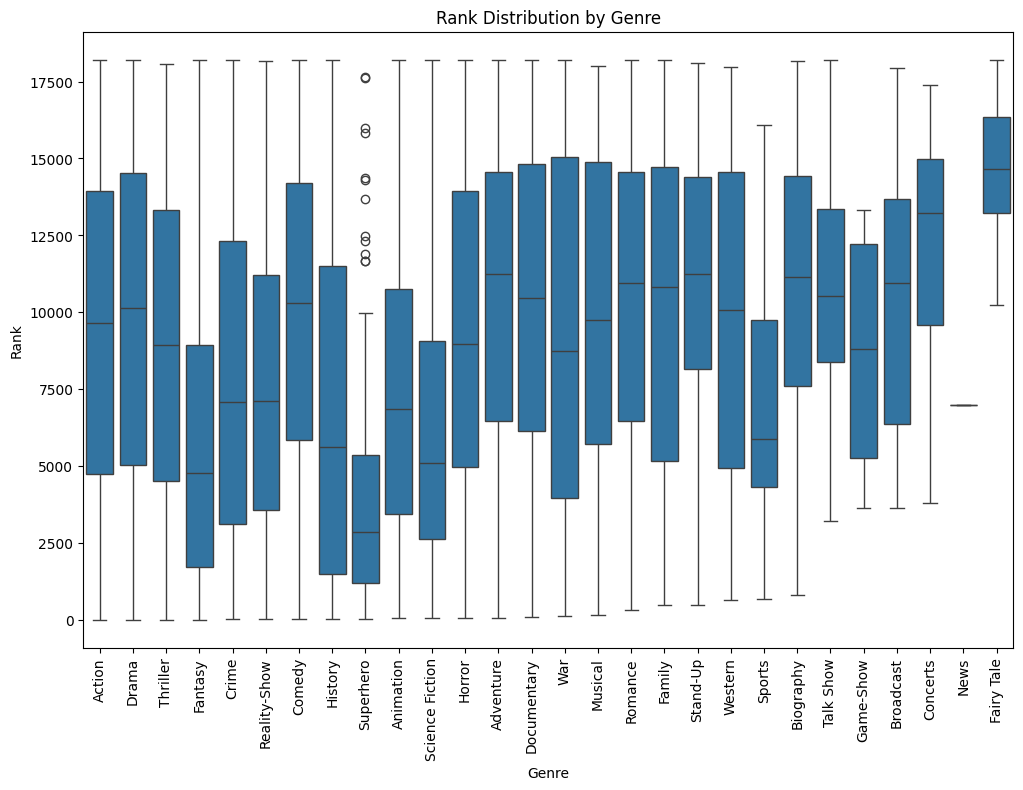

In [36]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='Genre', y='Rank', data=df)
plt.title('Rank Distribution by Genre')
plt.xlabel('Genre')
plt.ylabel('Rank')
plt.xticks(rotation=90)
plt.show()


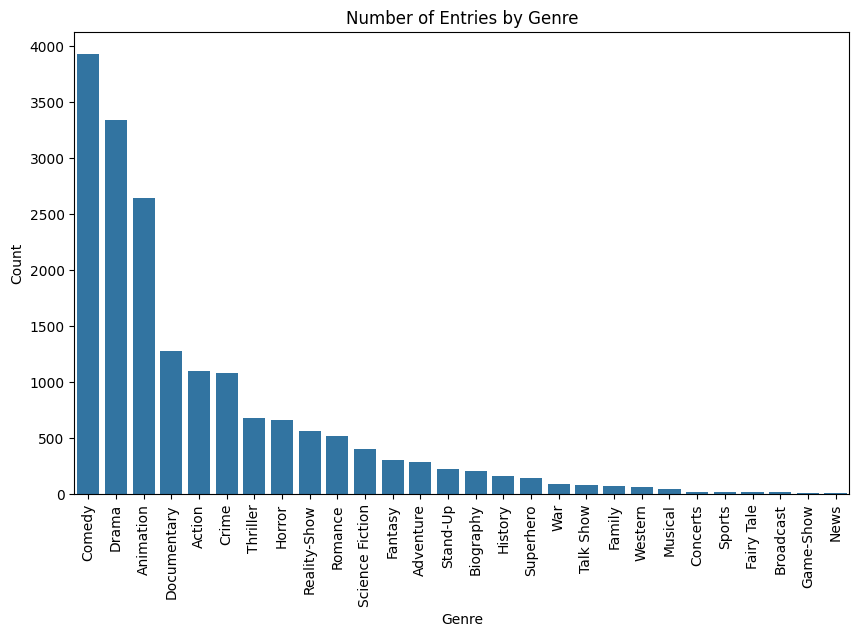

In [38]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Genre', data=df, order=df['Genre'].value_counts().index)
plt.title('Number of Entries by Genre')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()


In [41]:
import plotly.express as px

genre_rank_avg = df.groupby('Genre')[['Rank']].mean().reset_index()

fig = px.bar(genre_rank_avg, x='Genre', y='Rank', title='Average Rank by Genre',
             labels={'Rank': 'Average Rank', 'Genre': 'Genre'},
             text='Rank')
fig.update_layout(xaxis_title='Genre', yaxis_title='Average Rank')



ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'alignmentgroup': 'True',
              'hovertemplate': 'Genre=%{x}<br>Average Rank=%{text}<extra></extra>',
              'legendgroup': '',
              'marker': {'color': '#636efa', 'pattern': {'shape': ''}},
              'name': '',
              'offsetgroup': '',
              'orientation': 'v',
              'showlegend': False,
              'text': array([ 9321.67515924, 10270.64412811,  7439.19825625, 10830.05555556,
                             10788.16666667,  9924.56064073, 12212.61111111,  7768.06296296,
                             10263.62588235,  9680.08173653, 14639.        , 10128.85915493,
                              5853.61386139,  8640.75      ,  6636.84415584,  9324.26911315,
                              9817.51282051,  6965.        ,  7559.95373665, 10439.76685934,
                              6346.83919598,  7507.58823529, 11266.        ,  4121.37062937,
                             11021.91358025,  8899.21068249,  9282.87777778,  9855.54545455]),
              'textposition': 'auto',
              'type': 'bar',
              'x': array(['Action', 'Adventure', 'Animation', 'Biography', 'Broadcast', 'Comedy',
                          'Concerts', 'Crime', 'Documentary', 'Drama', 'Fairy Tale', 'Family',
                          'Fantasy', 'Game-Show', 'History', 'Horror', 'Musical', 'News',
                          'Reality-Show', 'Romance', 'Science Fiction', 'Sports', 'Stand-Up',
                          'Superhero', 'Talk Show', 'Thriller', 'War', 'Western'], dtype=object),
              'xaxis': 'x',
              'y': array([ 9321.67515924, 10270.64412811,  7439.19825625, 10830.05555556,
                          10788.16666667,  9924.56064073, 12212.61111111,  7768.06296296,
                          10263.62588235,  9680.08173653, 14639.        , 10128.85915493,
                           5853.61386139,  8640.75      ,  6636.84415584,  9324.26911315,
                           9817.51282051,  6965.        ,  7559.95373665, 10439.76685934,
                           6346.83919598,  7507.58823529, 11266.        ,  4121.37062937,
                          11021.91358025,  8899.21068249,  9282.87777778,  9855.54545455]),
              'yaxis': 'y'}],
    'layout': {'barmode': 'relative',
               'legend': {'tracegroupgap': 0},
               'template': '...',
               'title': {'text': 'Average Rank by Genre'},
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0], 'title': {'text': 'Genre'}},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'Average Rank'}}}
})

In [43]:

fig = px.box(df, x='Genre', y='Rank', title='Rank Distribution by Genre',
             labels={'Rank': 'Rank', 'Genre': 'Genre'})
fig.update_layout(xaxis_title='Genre', yaxis_title='Rank')


ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'alignmentgroup': 'True',
              'hovertemplate': 'Genre=%{x}<br>Rank=%{y}<extra></extra>',
              'legendgroup': '',
              'marker': {'color': '#636efa'},
              'name': '',
              'notched': False,
              'offsetgroup': '',
              'orientation': 'v',
              'showlegend': False,
              'type': 'box',
              'x': array(['Action', 'Drama', 'Thriller', ..., 'Comedy', 'Comedy', 'Crime'],
                         dtype=object),
              'x0': ' ',
              'xaxis': 'x',
              'y': array([    1,     2,     3, ..., 18212, 18213, 18214]),
              'y0': ' ',
              'yaxis': 'y'}],
    'layout': {'boxmode': 'group',
               'legend': {'tracegroupgap': 0},
               'template': '...',
               'title': {'text': 'Rank Distribution by Genre'},
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0], 'title': {'text': 'Genre'}},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'Rank'}}}
})